we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

Questions we need to answer about it :
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

**Geting Data**

The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website.
- Yahoo Finance is a rich resource of financial market data and tools to find compelling investments

In [ ]:
!pip install -q yfinance

### Import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# for reading stock from yahoo finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


### Load Data

In [ ]:
# the tech stock we will use for analysis
tech_list =['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
# Get the current time
time_now = datetime.now()

# Define start and end dates
end = datetime(2023, time_now.month, time_now.day)   # End date is today
start = datetime(2022, time_now.month, time_now.day)


for stock in tech_list :
  globals()[stock] =yf.download(stock,start,end)


company_list =[AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name


df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-09,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.250000,96.209999,92.180000,93.680000,56218700.0
2023-03-10,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,90.730003,93.570000,90.250000,92.669998,69827500.0
2023-03-13,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,92.430000,94.019997,88.120003,89.970001,72397100.0
2023-03-14,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,94.879997,95.070000,92.709999,93.830002,60912700.0
2023-03-15,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,96.199997,96.669998,93.070000,93.220001,70731800.0
2023-03-16,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.040001,100.989998,95.610001,95.750000,84446900.0
2023-03-17,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,98.949997,100.660004,97.459999,99.790001,87300200.0
2023-03-20,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,97.709999,98.480003,95.699997,98.410004,62388900.0


In [ ]:
df['Close']

Ticker,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-03-23,167.496002,NaN,NaN,NaN
2022-03-24,171.294418,NaN,NaN,NaN
2022-03-25,171.934067,NaN,NaN,NaN
2022-03-28,172.800034,NaN,NaN,NaN
2022-03-29,176.106491,NaN,NaN,NaN
...,...,...,...,...
2023-03-16,NaN,NaN,NaN,100.040001
2023-03-17,NaN,NaN,NaN,98.949997
2023-03-20,NaN,NaN,NaN,97.709999


In [ ]:
# Summary Stats
AAPL.head()

Price,Close,High,Low,Open,Volume,company_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2022-03-23,167.496002,169.887249,164.976809,165.311399,98062700,APPLE
2022-03-24,171.294418,171.363294,167.495966,168.332404,90131400,APPLE
2022-03-25,171.934067,172.485135,169.995477,171.107464,80546200,APPLE
2022-03-28,172.800034,172.927950,169.257430,169.424718,90371900,APPLE
2022-03-29,176.106491,176.155682,173.528257,173.872682,100589400,APPLE


### Descriptive Statistics about the Data

In [ ]:
# Summary Stats
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,148.187704,150.081693,146.148410,148.022131,8.239237e+07
std,11.557968,11.462480,11.601337,11.554069,2.351369e+07
min,123.583115,126.301508,122.742880,124.561717,3.519590e+07
25%,140.555954,141.950427,138.143794,140.325799,6.781880e+07
50%,147.423279,149.037254,145.538723,146.908591,7.716790e+07
75%,154.296898,156.124327,152.057834,154.313369,9.042650e+07
max,176.106491,176.746082,173.882479,175.702986,1.826020e+08


We have only 252 records in one year because weekends are not included in the data.

In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-23 to 2023-03-22
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     251 non-null    float64
 1   (High, AAPL)      251 non-null    float64
 2   (Low, AAPL)       251 non-null    float64
 3   (Open, AAPL)      251 non-null    float64
 4   (Volume, AAPL)    251 non-null    int64  
 5   (company_name, )  251 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


### Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

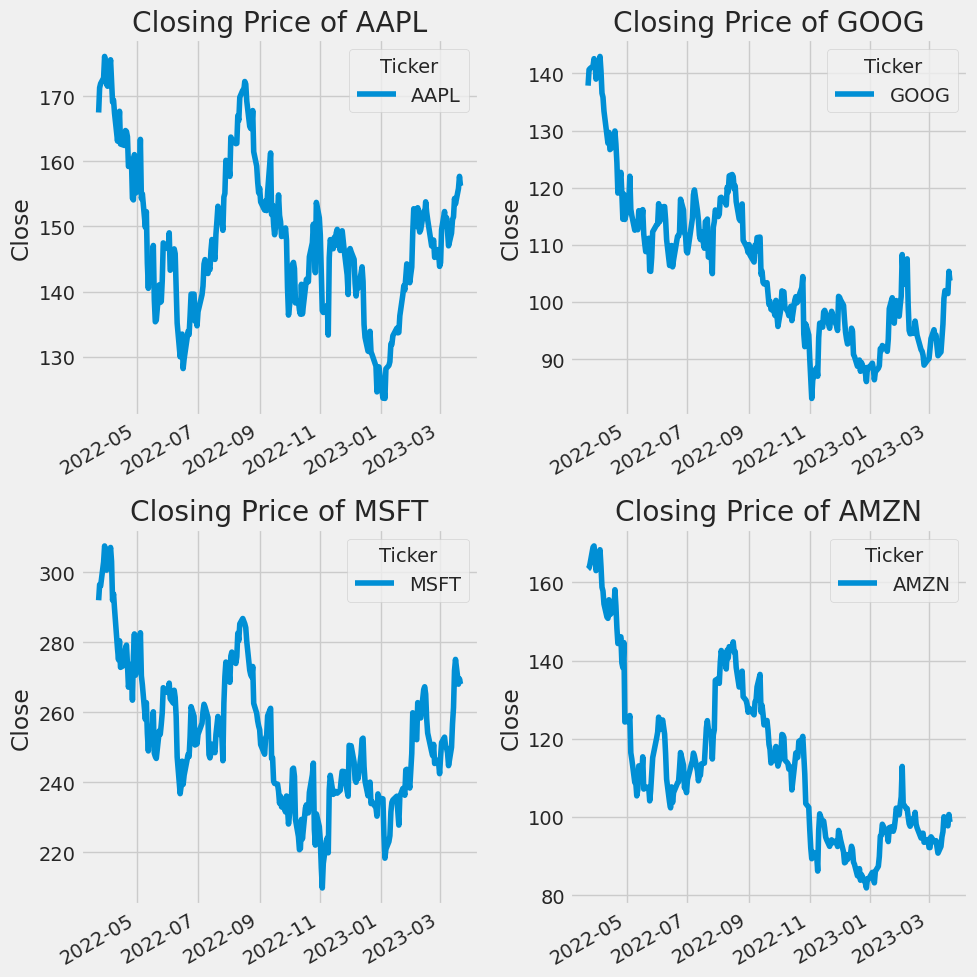

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid
fig.subplots_adjust(top=1.25, bottom=0.2)  # Adjust spacing

for i, (company, ax) in enumerate(zip(company_list, axes.flatten())):
    company['Close'].plot(ax=ax)
    ax.set_ylabel('Close')
    ax.set_xlabel(None)
    ax.set_title(f"Closing Price of {tech_list[i]}")

plt.tight_layout()
plt.show()


### Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

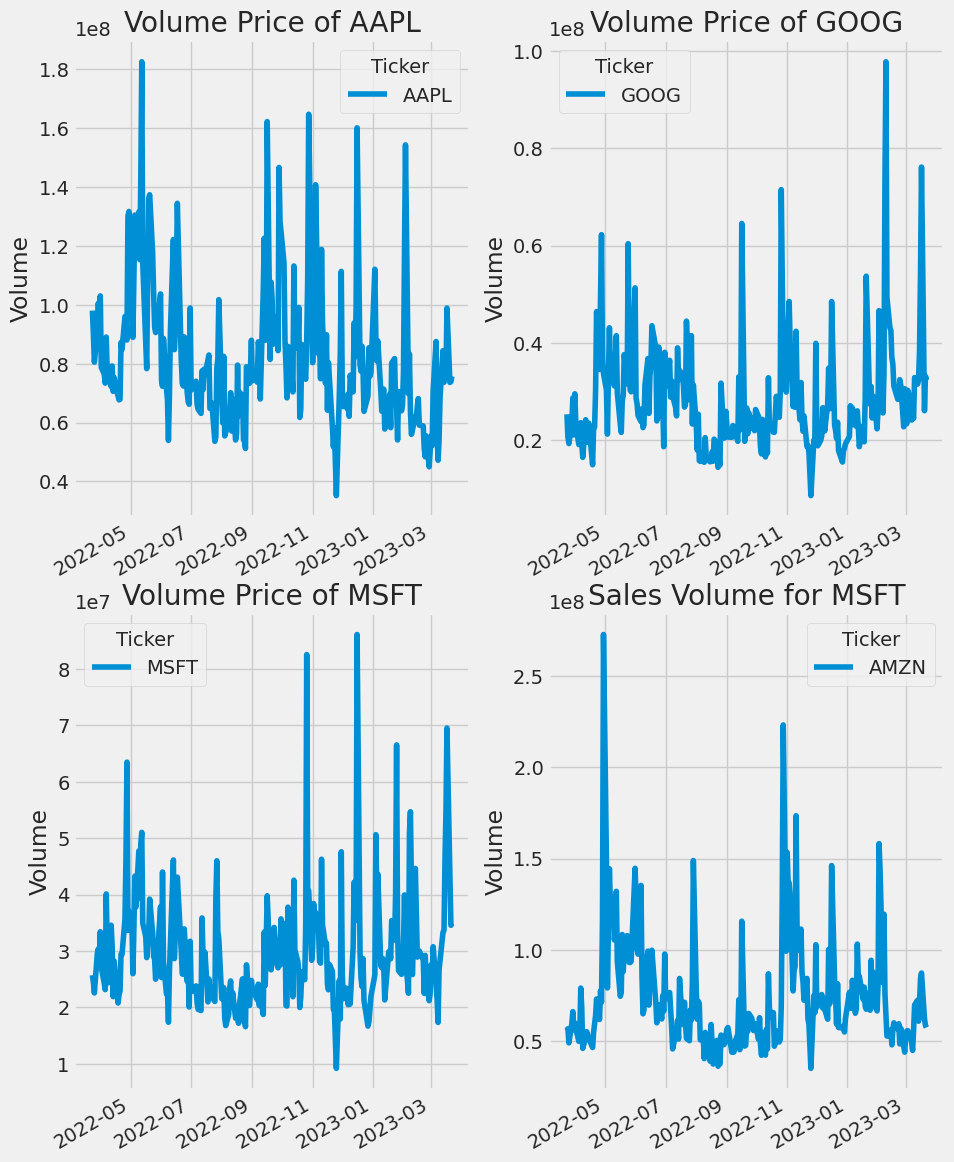

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid
fig.subplots_adjust(top=1.25, bottom=0.2)  # Adjust spacing

for i, (company, ax) in enumerate(zip(company_list, axes.flatten())):
    company['Volume'].plot(ax=ax)
    ax.set_ylabel('Volume')
    ax.set_xlabel(None)
    ax.set_title(f"Volume Price of {tech_list[i]}")
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.show()
plt.tight_layout()

### What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

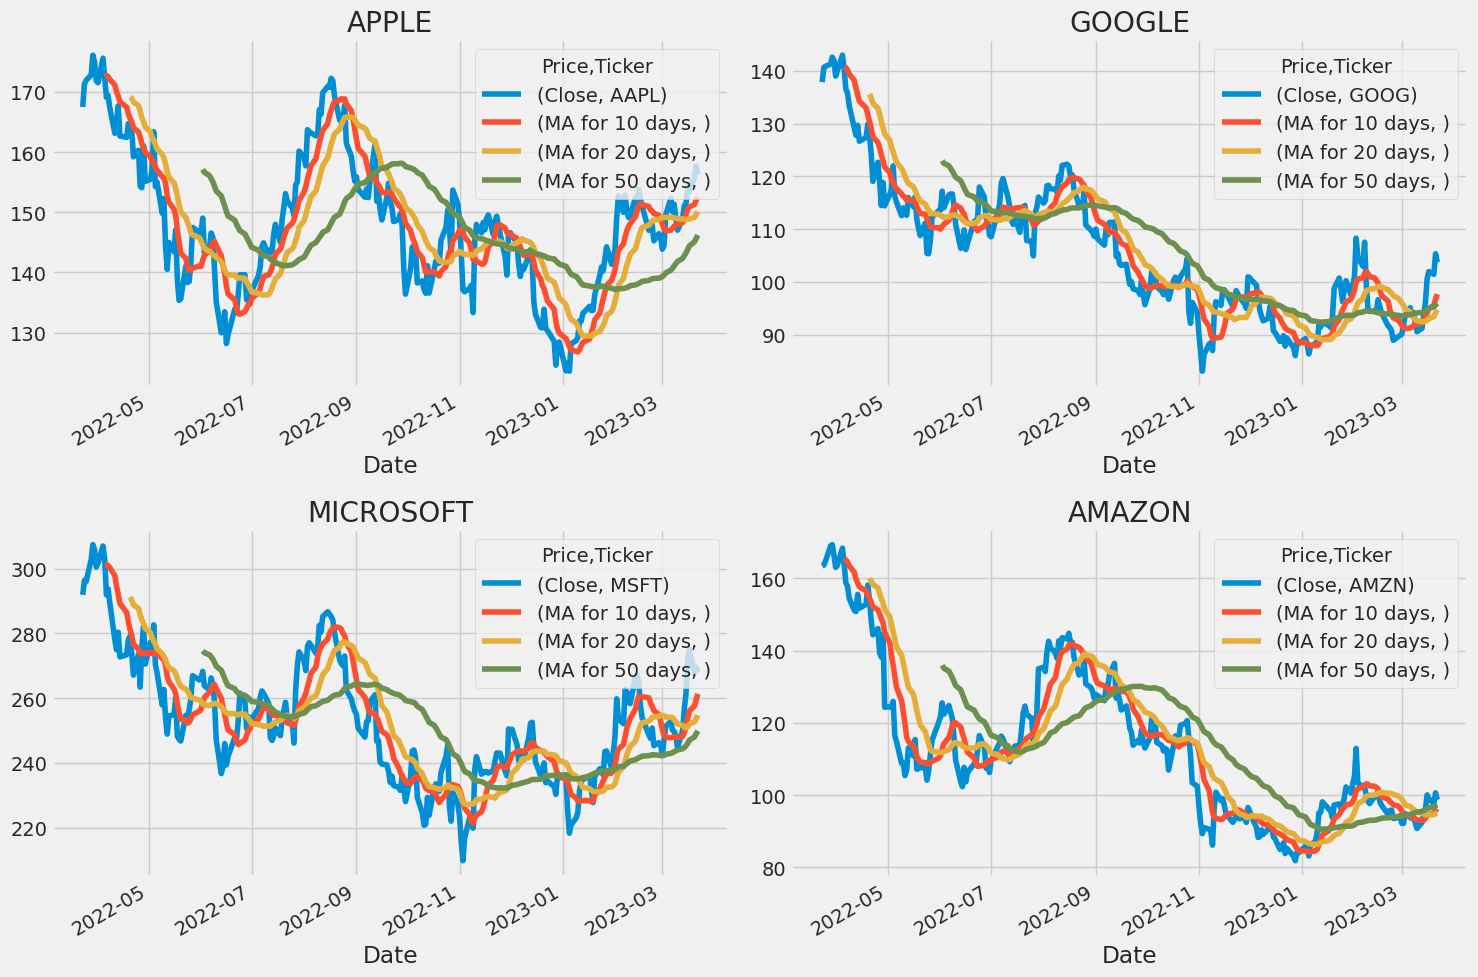

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

### What was the daily return of the stock on average?
We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock

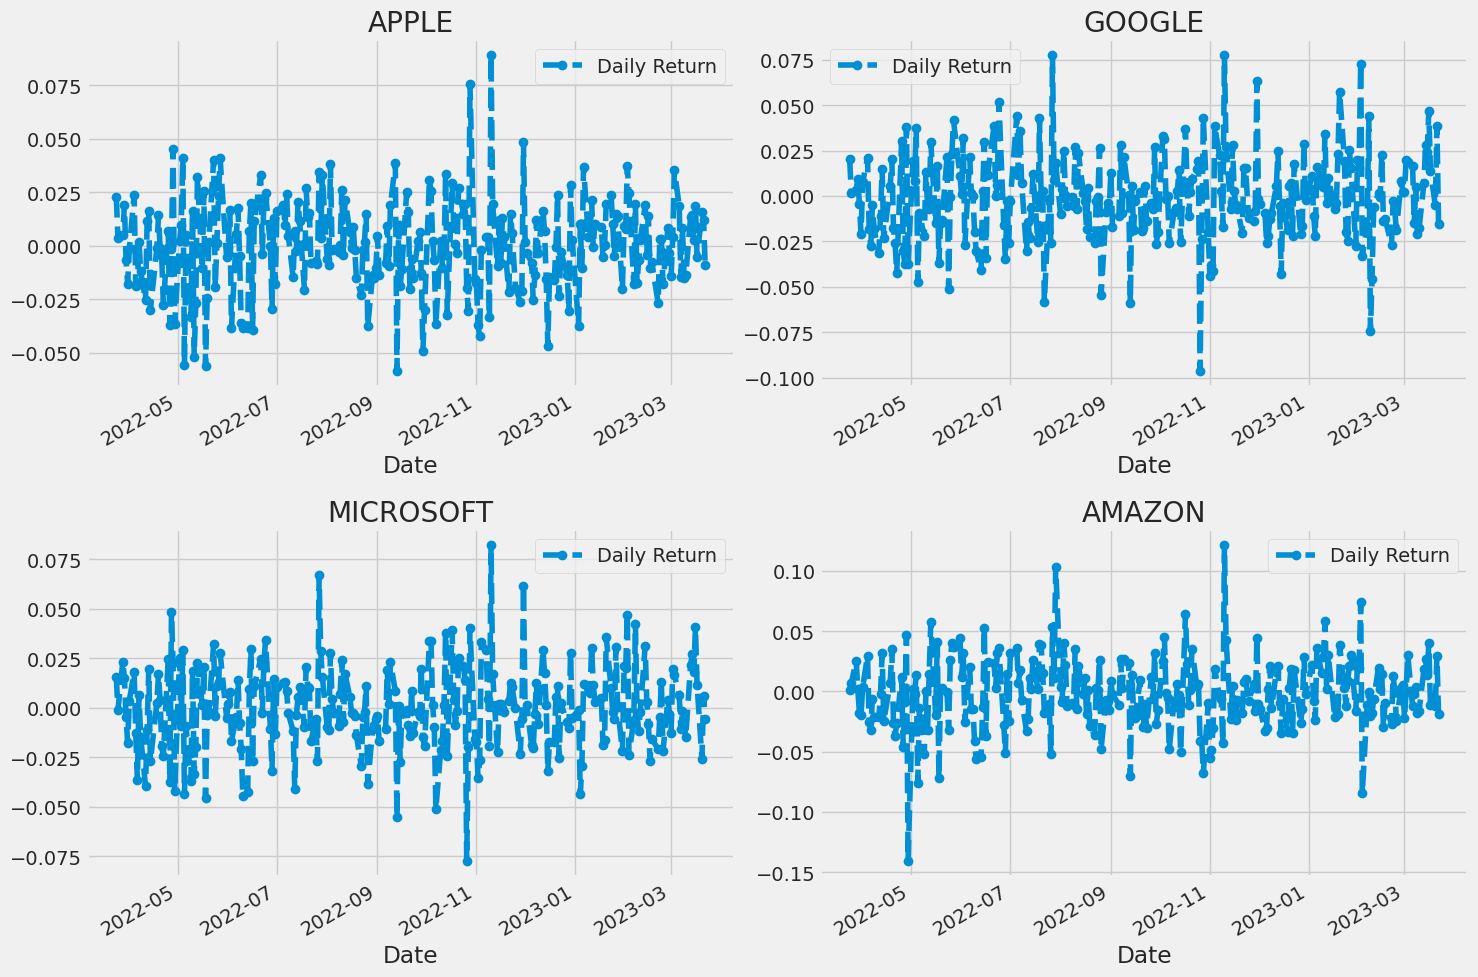

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

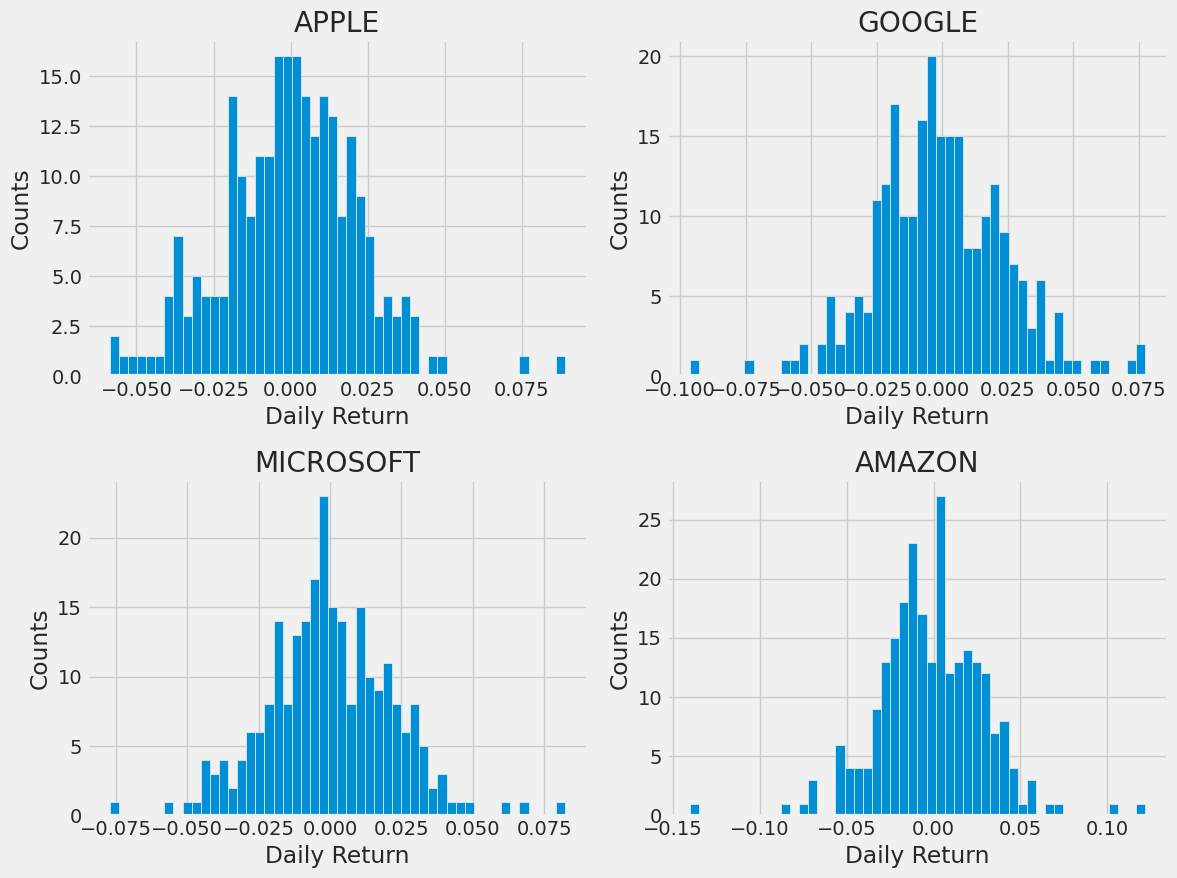

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

### Predicting the closing price stock price of APPLE

In [12]:
# Get the stock quote
# using yfinance instead of pdr
import yfinance as yf
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
# Select 'Close' price only
df = df[['Close']]
df

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2012-01-03,12.375388
2012-01-04,12.441896
2012-01-05,12.580024
2012-01-06,12.711537
2012-01-09,12.691372
...,...
2025-03-17,214.000000
2025-03-18,212.690002


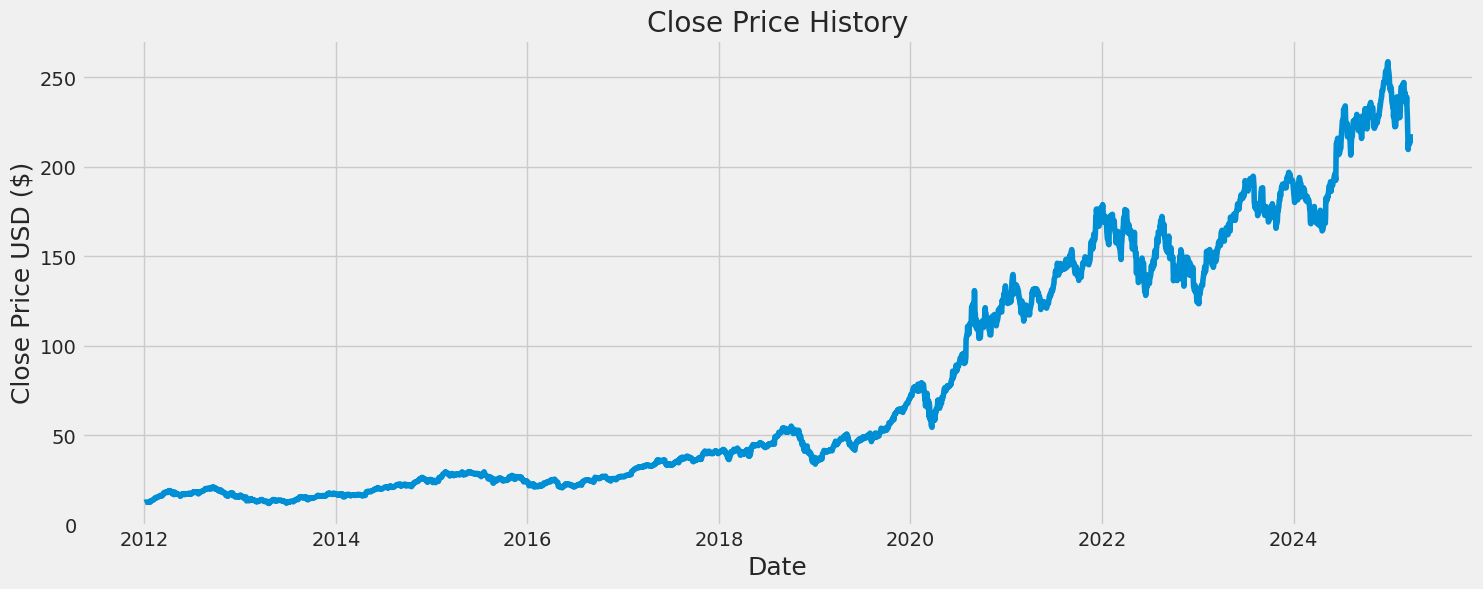

In [13]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Split dataset

In [14]:
 # Split data BEFORE scaling to avoid data leakage
train_size = int(len(df) * 0.8)
val_size = int(len(df) * 0.1)

train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]

# Scaling data

In [15]:
# Apply MinMaxScaler separately on each split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)

### Multivariate LSTM

In [17]:
# convert dataframe into x and y
def convert_xy(df):
    X=[]
    Y=[]
    ws = 6
    for i in range(ws,len(df)):
        x=df[i-ws:i,:]
        y =df[i,0:1]

        X.append(x)
        Y.append(y)

    return np.array(X),np.array(Y)


x_train, y_train = convert_xy(train_scaled)
x_val, y_val = convert_xy(val_scaled)
x_test, y_test = convert_xy(test_scaled)

In [18]:
x_train.shape,y_train.shape

((2653, 6, 1), (2653, 1))

In [19]:
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build the bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=( x_train.shape[1], x_train.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), batch_size=10, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Validation Loss: {loss}')


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


266/266 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0228 - val_loss: 0.0013
Epoch 2/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.9321e-04 - val_loss: 0.0034
Epoch 3/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5865e-04 - val_loss: 5.8922e-04
Epoch 4/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8659e-04 - val_loss: 7.8092e-04
Epoch 5/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8969e-04 - val_loss: 5.5201e-04
Epoch 6/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9353e-04 - val_loss: 6.8159e-04
Epoch 7/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7492e-04 - val_loss: 5.5135e-04
Epoch 8/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7893e-04 - val_loss: 8.2293e-04
Epoch 9/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9496e-04 - val_loss: 0.0018
Epoch 10/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6380e-04 - val_loss: 5.2458e-04
Epoch 11/30
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9655e-04 - val_loss: 0

In [21]:
# Make predictions
pred = model.predict(x_test)
# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [25]:
#  **Inverse Transform Predictions and Actual Values**
y_pred = scaler.inverse_transform(pred.reshape(-1, 1))
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [26]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 5.918606765108771
R2 Score: 0.9449925925793959


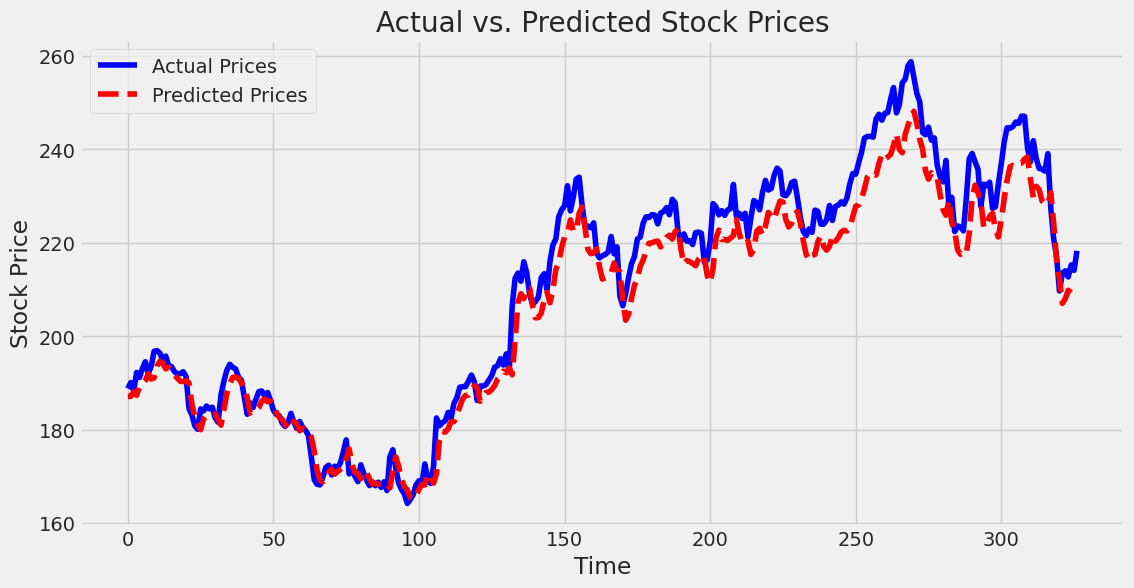

In [27]:
# **Plot Actual vs. Predicted Stock Prices**
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

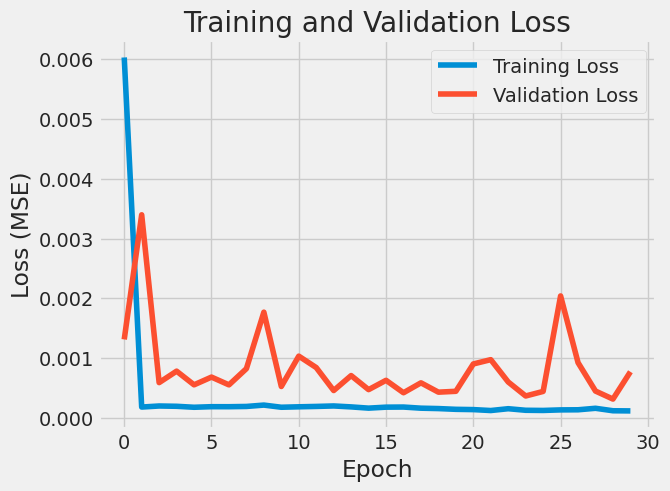

In [28]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()